In [40]:
#  NumPy and Pandas imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#  Reading time series
from pandas_datareader import data

#  Technical Analysis
import pandas_ta as ta

#  Time stamps
import datetime as datetime

#  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

#  Visualize Decision Tree
import graphviz

#  Visualization (sns is a visualization library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


In [2]:
#  Start and End Date
start = datetime.date(2017, 4, 10)
end = datetime.date(2019, 4, 10)

#  Assign a database with historical stock quotes from Yahoo! Finance to CSCO
#  Cisco Systems, Inc.
CSCO = data.get_data_yahoo('CSCO', start, end)

In [3]:
CSCO.tail(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-11,55.950001,55.310001,55.93,55.599998,13186000.0,55.599998


In [4]:
CSCO_processed = CSCO.ewm(alpha = .130).mean()
# CSCO_processed['Date'] = CSCO_processed.index
# CSCO_processed.set_index('Date')
CSCO_processed.tail(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-11,54.977179,54.283772,54.592905,54.709012,1.665225e+07,54.562375


# Feature Extraction
---------
Possibly use pyti, finta?

### Momentum Indicators
Momentum is the measurement of the speed or velocity of price changes. It measures the rate of the rise
or fall in stock's price or volume. It is the rate of change on price or volume movements for
a particular asset. 

Relative Strength Index
Stochastic Oscillator
Williams %R
Moving Average Convergence Divergence
Price Rate of Change
On Balance Volume

## Prediction Indicator (to be class label attribute)

In [5]:
CSCO_Features = CSCO_processed.copy()

In [6]:
#  1 is True (return positive), 0 is False (return negative)
CSCO_Features['Return'] = CSCO_Features['Close'].pct_change(1).shift(-1)
CSCO_Features['Target_Return'] = np.where(CSCO_Features['Return'] > 0, 1, 0)

In [7]:
CSCO_Features.drop(labels=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Return'], 
                   axis=1, inplace=True)

## Relative Strength Index (RSI)
Type of momentum indicator

The RSI is a calculated ratio of the recent upward price movements to the absolute price movement.
The RSI ranges from 0 to 100. It's interpreted as an overbought indicator 
when the value is over 70, and an oversold indicator when the value is below 30.

This will give our categorical attribute three values?  

RSI(Series, Period)
The period is the number of observations the indicator will go back to. The default
that most traders use is 14



In [9]:
CSCO_Features['RSI'] = CSCO_processed.ta.rsi(close='Close') 
CSCO_Features['RSI'].tail()


Date
2019-04-05    98.794660
2019-04-08    98.874848
2019-04-09    98.924566
2019-04-10    98.999184
2019-04-11    99.049772
Name: RSI, dtype: float64

/home/trevor/anaconda3/envs/CS4315/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


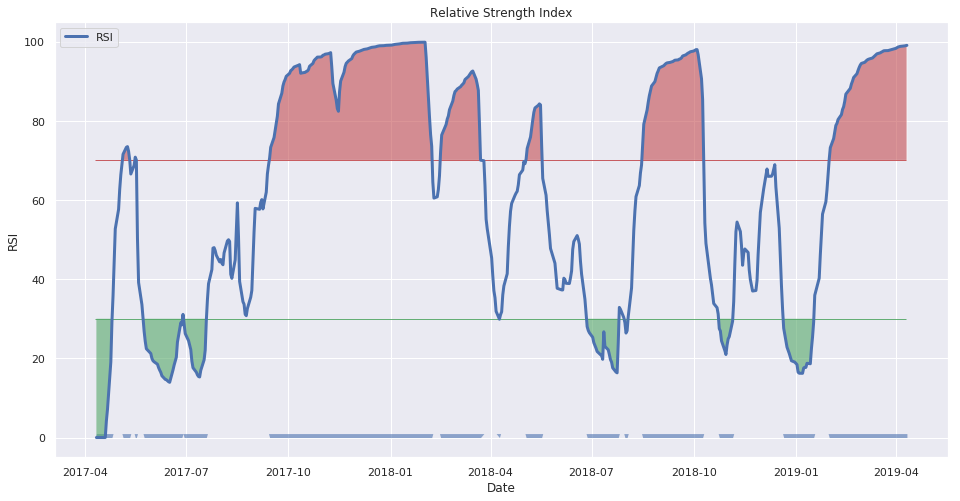

In [10]:
sns.set(rc={"lines.linewidth": 0.9})
figsize_2 = (16, 8)
figure_2, ax_2 = plt.subplots(figsize=figsize_2)
palette_2 = sns.color_palette('Blues', n_colors=1, desat=.9)
ax_2.set_title('Relative Strength Index')

RSI_line = sns.lineplot(x=CSCO_Features.index, y=CSCO_Features['RSI'], legend='full', 
                        palette=['b'],
                        lw=3,
                        label='RSI')
RSI_line.hlines(70, start, end, linestyles='-', colors='r', label='overbought')
RSI_line.hlines(30, start, end, linestyles='-', colors='g', label='oversold')
RSI_line.hlines(30, start, end, linestyles='-', colors='b', linewidth=0)
RSI_line.fill_between(CSCO_Features.index, CSCO_Features['RSI'], 70, where=CSCO_Features['RSI']>70,
                      interpolate=True,
                      alpha=0.6,
                      facecolor='r',
                      label='overbought')
RSI_line.fill_between(CSCO_Features.index, CSCO_Features['RSI']<70, CSCO_Features['RSI']>30,
                      alpha=.6,
                      facecolor='b',
                      linewidth=0,
                      label='unidentified')
RSI_line.fill_between(CSCO_Features.index, CSCO_Features['RSI'], 30, where=CSCO_Features['RSI']<30,
                      interpolate=True,
                      alpha=0.6,
                      facecolor='g',
                      linewidth=0,
                      label='oversold')


In [10]:
# CSCO_classes = CSCO_processed.copy()
# CSCO_classes.drop(labels=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], axis=1, inplace=True)
# random=2


Turn RSI into categorical data

In [11]:
# def rsi_categorical(x):
#     if 0 < x <= 30:
#         return 'oversold'
#     elif 30 < x < 70:
#         return 'unknown'
#     return 'overbought'

In [12]:
# CSCO_classes['RSI'] = CSCO_classes['RSI'].apply(rsi_categorical)

KeyError: 'RSI'

In [13]:
# CSCO_classes['RSI'].value_counts()

KeyError: 'RSI'

## Williams Percentage Range (Williams %R)
**overbought:** a security that analyst or traders believe is trading above intrinsic value
**oversold:** condition where an asset has traded lower in price and has the potential for
a price bounce. 

Overbought means the price is near the highs of its recent range, oversold means the price is 
at the lower end of its recent range. 

A type of momentum indicator which measures overbought and oversold levels. It moves
between 0 and -100. A reading above -20 is overbought. A reading below -80 is oversold.

Compares a stock's closing price to the high-low range over a specified period, usually 14 days
 
       Highest - Close
    = ------------------ * -100
      Highest - Lowest

Highest is the highest price in look back period, 
Close is the most recent closing price, 
Lowest is the lowest price in the look back period


In [11]:
CSCO_Features['W %R'] = CSCO_processed.ta.willr(close='Close', high='High', low='Low')
CSCO_Features['W %R'].tail()

Date
2019-04-05   -11.984731
2019-04-08   -10.794006
2019-04-09   -10.713181
2019-04-10    -9.229874
2019-04-11    -9.268049
Name: W %R, dtype: float64

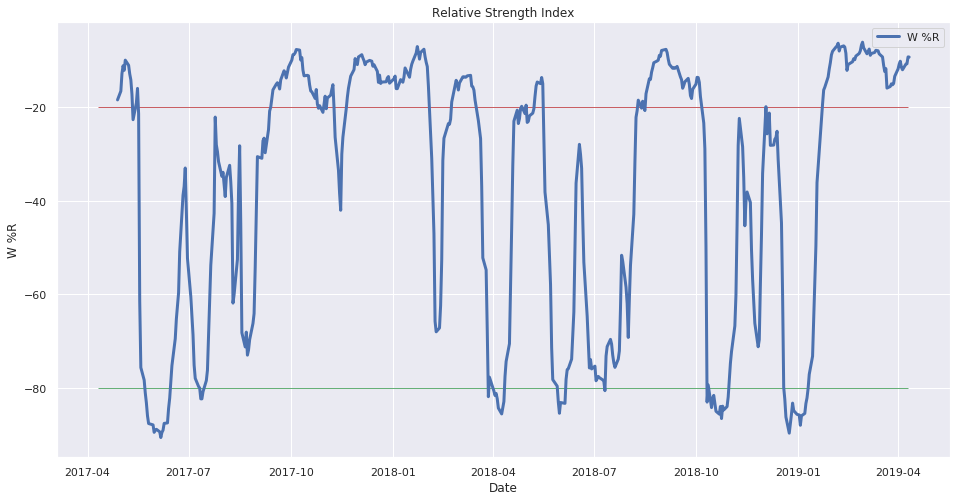

In [12]:
sns.set(rc={"lines.linewidth": 0.9})
figsize_3 = (16, 8)
figure_3, ax_3 = plt.subplots(figsize=figsize_3)
palette_3 = sns.color_palette('Blues', n_colors=1, desat=.9)
ax_3.set_title('Relative Strength Index')

WPR_line = sns.lineplot(x=CSCO_Features.index, y=CSCO_Features['W %R'], legend='full', 
                        palette=['b'],
                        lw=3,
                        label='W %R')
WPR_line.hlines(-20, start, end, linestyles='-', colors='r', label='overbought')
WPR_line.hlines(-80, start, end, linestyles='-', colors='g', label='oversold')


In [19]:
# CSCO_classes['W %R'] = CSCO_Features['W %R'].copy()

Turn Williams %R into categorical data

In [ ]:
# def wpr_categorical(x):
#     if -20 <= x < 0:
#         return 'overbought'
#     elif -80 < x < -20:
#         return 'unknown'
#     return 'oversold'

In [ ]:
# CSCO_classes['W %R'] = CSCO_classes['W %R'].apply(wpr_categorical)

In [ ]:
# CSCO_classes['W %R'].value_counts()

## Stochastic Oscillator (%K and %D)
The term stochastic refers to the point of a current price in relation to its price
range over a period of time.

The stochastic oscillator is a momentum indicator that uses support and resistance levels.
Very similar to the Williams %R

A support level is a level where the price finds support as it falls. The price
is more likely to go up from this level than continue down.

A resistance level is the opposite of a support level. The price finds resistance as it rises. 
The price is more likely to drop from this level than continue rising. 

        Close - Lowest
        ---------------- * 100
        Highest - Lowest

Highest is the highest value over a range, Lowest is the lowest value over a range.

A rule in finance is that momentum changes before price changes. This category will 
determine if momentum has changed before price has changed. 

When the %K is lower than %D and %K is above 80, overbought
When the %K is above %D and %K is under 20, oversold

In [13]:
CSCO_Features[['STOCHF_14', 'STOCHF_3', 'STOCH_5', 'STOCH_3']] = \
    CSCO_processed.ta.stoch(close='Close', high='High', low='Low')

In [14]:
CSCO_Features.rename(columns={'STOCHF_14': '%K', 
                              'STOCHF_3': '%D', 
                              'STOCH_5': 'Slow %K',
                              'STOCH_3': 'Slow %D'}, inplace=True)

In [15]:
CSCO_Features.loc[:, ['%K', '%D', 'Slow %K', 'Slow %D']].tail()

,%K,%D,Slow %K,Slow %D
Date,,,,
2019-04-05,80.158720,81.392138,79.595501,76.718722
2019-04-08,80.556787,80.741696,80.815715,79.231379
2019-04-09,78.940154,79.885220,80.734671,80.381962
2019-04-10,80.761500,80.086147,80.385348,80.645245
2019-04-11,78.784279,79.495311,79.840288,80.320102


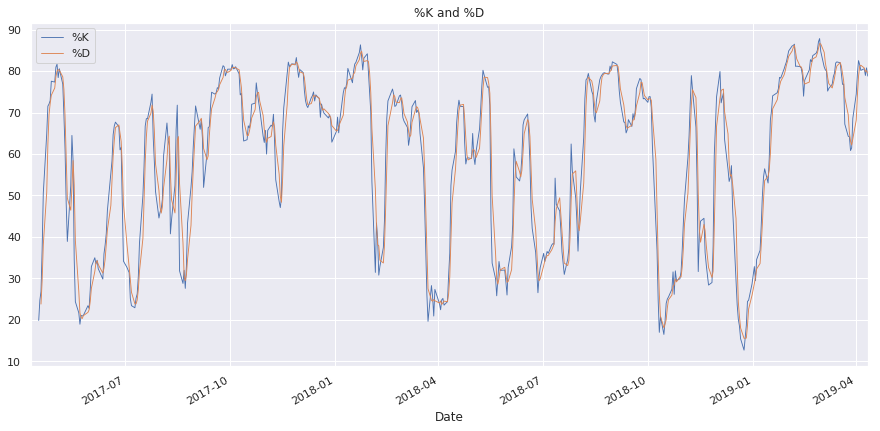

In [16]:
CSCO_Features['%K'].plot(legend=True, 
                                 figsize=(15, 7),
                                 title='%K and %D',
                                 label='%K')
CSCO_Features['%D'].plot(legend=True,
                                label='%D')

## Moving Average Convergence Divergence (MACD)
MACD identifies strength, direction, momentum, and duration of a security's overall trend.
The MACD indicator (oscillator) is three time series created from the closing price.
These are the proper MACD series, the moving average of the MACD series, and the difference
between the MACD series and MA(MACD). 

The MACD time series is: (12-Day Estimated Moving Average - 26-Day Estimated Moving Average) <br>
The Signal Line time series is: (9-Day Estimated Moving Average of MACD) <br>
The MACD Histogram time series is: (MACD time series - Signal line time series) <br> 

A fast moving average responds more quickly than a slow moving average to a recent change in stock's
price. The MACD compares moving averages of different periods to indicate changes of a stock's trend

In [17]:
CSCO_Features[['MACD_12_26_9', 'MACDH_12_26_9', 'MACDS_12_26_9']] = CSCO_processed.ta.macd(close='Close')

In [18]:
CSCO_Features.rename(columns={'MACD_12_26_9': 'MACD', 
                              'MACDH_12_26_9': 'MACD Difference', 
                              'MACDS_12_26_9': 'MACD Signal'}, inplace=True)

In [19]:
CSCO_Features.loc[:, ['MACD', 'MACD Difference', 'MACD Signal']].tail()

,MACD,MACD Difference,MACD Signal
Date,,,
2019-04-05,1.226168,-0.008418,1.234587
2019-04-08,1.230907,-0.002943,1.233851
2019-04-09,1.230010,-0.003073,1.233082
2019-04-10,1.230119,-0.002371,1.232490
2019-04-11,1.226807,-0.004546,1.231353


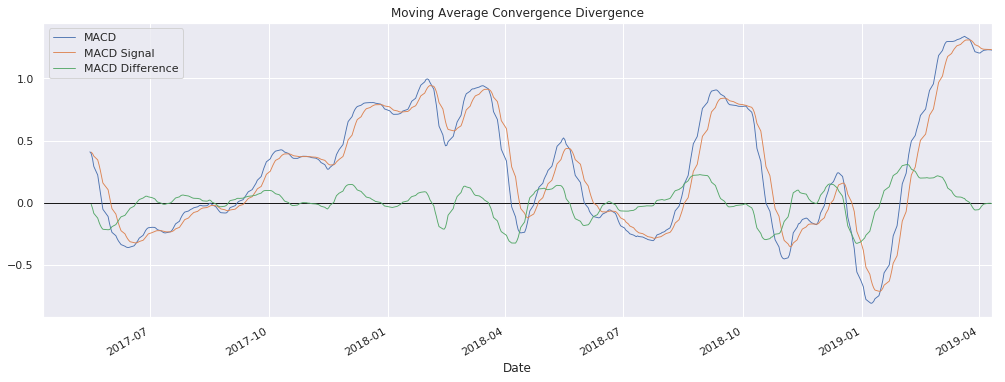

In [20]:
figsize_4 = (17, 6)
figure_4, ax_4 = plt.subplots(figsize=figsize_4)
CSCO_Features['MACD'].plot(legend=True, 
                                 title='Moving Average Convergence Divergence',
                                 label='MACD')
CSCO_Features['MACD Signal'].plot(legend=True,
                                label='MACD Signal')
CSCO_Features['MACD Difference'].plot(legend=True,
                                      label='MACD Difference',
                                      linestyle='-').hlines(0, start, end, linewidth=1)

## Price Rate of Change (PROC)
Calculates the percent change in price between periods. When prices are rising PROC levels remain
above the zero line, when they are falling PROC levels are below the zero line.

        Close - Close n days ago
        ------------------------ 
            Close n days ago


In [21]:
CSCO_Features['PROC 7-Day'] = CSCO_processed.ta.roc(close='Close', length=7)
CSCO_Features['PROC 14-Day'] = CSCO_processed.ta.roc(close='Close', length=14)

In [22]:
CSCO_Features.loc[:, ['PROC 1-Day', 'PROC 7-Day', 'PROC 14-Day']].tail()

,PROC 1-Day,PROC 7-Day,PROC 14-Day
Date,,,
2019-04-05,0.310389,2.704413,4.321370
2019-04-08,0.336499,2.873684,4.290463
2019-04-09,0.217516,2.784873,4.199534
2019-04-10,0.341797,2.615941,4.104007
2019-04-11,0.243946,2.339601,4.276350


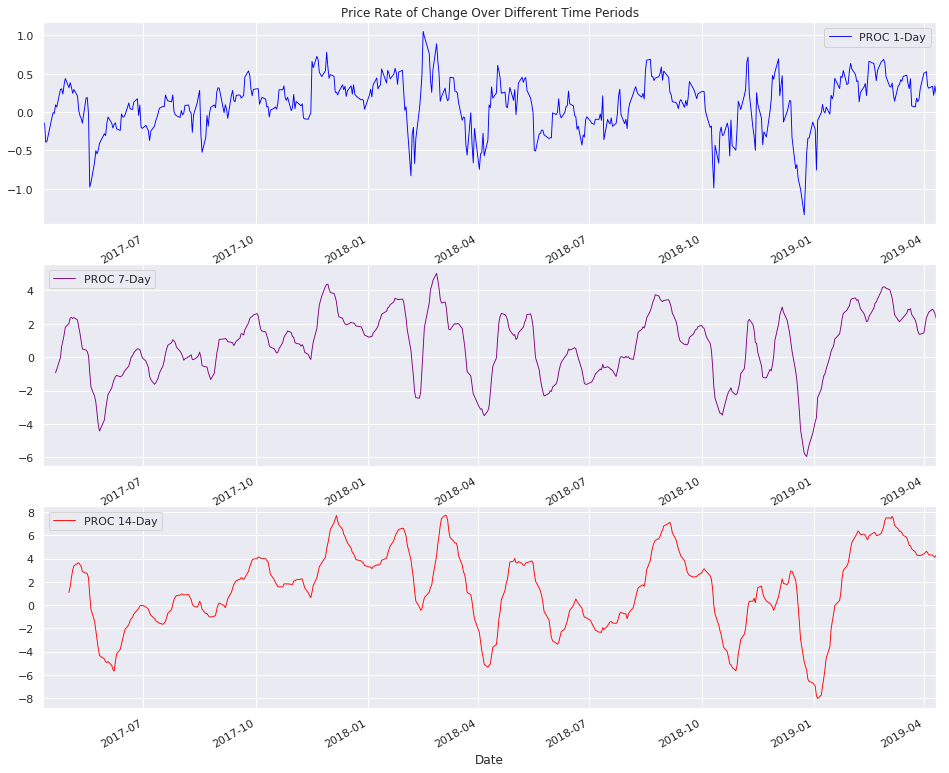

In [23]:
figure_5, ax_5 = plt.subplots(nrows=3, ncols=1, figsize=(16, 14))
#  Plot the rolling variance for original closing prices
CSCO_Features['PROC 1-Day'].plot(ax=ax_5[0],
                                 legend=True,
                                 title='Price Rate of Change Over Different Time Periods',
                                 color='blue')
#  Plot the rolling variance for log transformed closing prices
CSCO_Features['PROC 7-Day'].plot(ax=ax_5[1],
                                 legend=True,
                                 color='purple')
CSCO_Features['PROC 14-Day'].plot(ax=ax_5[2],
                                 legend=True,
                                 color='red')

## On Balance Volume (OBV)
On Balance Volume measures buying and selling pressure. When the volume on up days outpaces the volume 
on down days, the OBV rises. When down days outpace volume on up days, OBV falls. 


In [24]:
CSCO_Features['OBV'] = CSCO_processed.ta.roc(close='Close', volume='Volume')

In [25]:
CSCO_Features['OBV'].tail()

Date
2019-04-05    3.096332
2019-04-08    3.375476
2019-04-09    3.413351
2019-04-10    3.627151
2019-04-11    3.702197
Name: OBV, dtype: float64

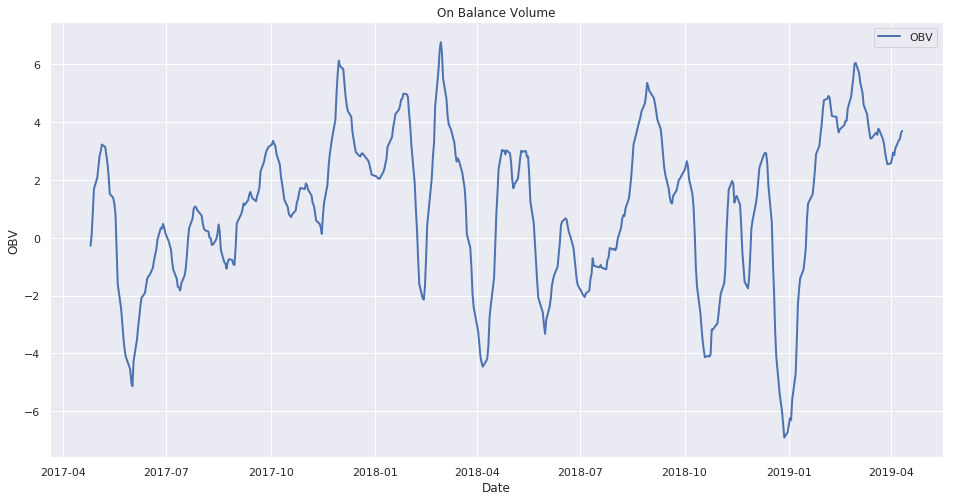

In [26]:
sns.set(rc={"lines.linewidth": 0.9})
figsize_6 = (16, 8)
figure_6, ax_6 = plt.subplots(figsize=figsize_6)
palette_6 = sns.color_palette('Blues', n_colors=1, desat=.9)
ax_6.set_title('On Balance Volume')

OBV_line = sns.lineplot(x=CSCO_Features.index, y=CSCO_Features['OBV'], legend='full', 
                        palette=['b'],
                        lw=2,
                        label='OBV')

In [27]:
#  All features
CSCO_Features.tail(1)

,Target_Return,RSI,W %R,%K,%D,Slow %K,Slow %D,MACD,MACD Difference,MACD Signal,PROC 1-Day,PROC 7-Day,PROC 14-Day,OBV
Date,,,,,,,,,,,,,,
2019-04-11,0,99.049772,-9.268049,78.784279,79.495311,79.840288,80.320102,1.226807,-0.004546,1.231353,0.243946,2.339601,4.27635,3.702197


In [69]:
#  Check Something
CSCO_Features.loc[:, ['Target_Return', 'PROC 1-Day']].head(20)

,Target_Return,PROC 1-Day
Date,,
2017-05-17,0,-0.027590
2017-05-18,0,-0.979427
2017-05-19,0,-0.922627
2017-05-22,0,-0.655176
2017-05-23,0,-0.503441
2017-05-24,0,-0.546636
2017-05-25,0,-0.496716
2017-05-26,0,-0.408861
2017-05-30,0,-0.283465


In [28]:
CSCO_Features.columns

Index(['Target_Return', 'RSI', 'W %R', '%K', '%D', 'Slow %K', 'Slow %D',
       'MACD', 'MACD Difference', 'MACD Signal', 'PROC 1-Day', 'PROC 7-Day',
       'PROC 14-Day', 'OBV'],
      dtype='object')

# Random Forest Classifier


In [29]:
CSCO_Features = CSCO_Features.dropna()

In [70]:
y = CSCO_Features['Target_Return']

In [71]:
Feature_Names = ['RSI', 'W %R', '%K', '%D', 'Slow %K', 'Slow %D', 'MACD',
       'MACD Difference', 'MACD Signal', 'PROC 7-Day',
       'PROC 14-Day', 'OBV']

In [72]:
Features = CSCO_Features[Feature_Names].dropna()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(Features, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=400,
                                                    stratify=y)

In [74]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(359, 12) (359,)
(120, 12) (120,)


### Construct Random Forest Classifier
n_estimators is the number of trees to build with Random Forest before aggregating the 
predictions. 

The splitting criterion used is the Gini impurity

oob_score is the "out-of-bag" (OOB) error for the forest. This is the average error of 
each training observation calculated using predictions from trees that don't 
contain that observation. 


In [75]:
Random_Forest = RandomForestClassifier(n_jobs=-1, 
                                       n_estimators=200, 
                                       criterion='gini', 
                                       oob_score=True, 
                                       random_state=10)

Fit the model to the training data

In [76]:
Random_Forest.fit(X_train, y_train.values)
Random_Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)

Visualize the first Decision Tree in the forest.  

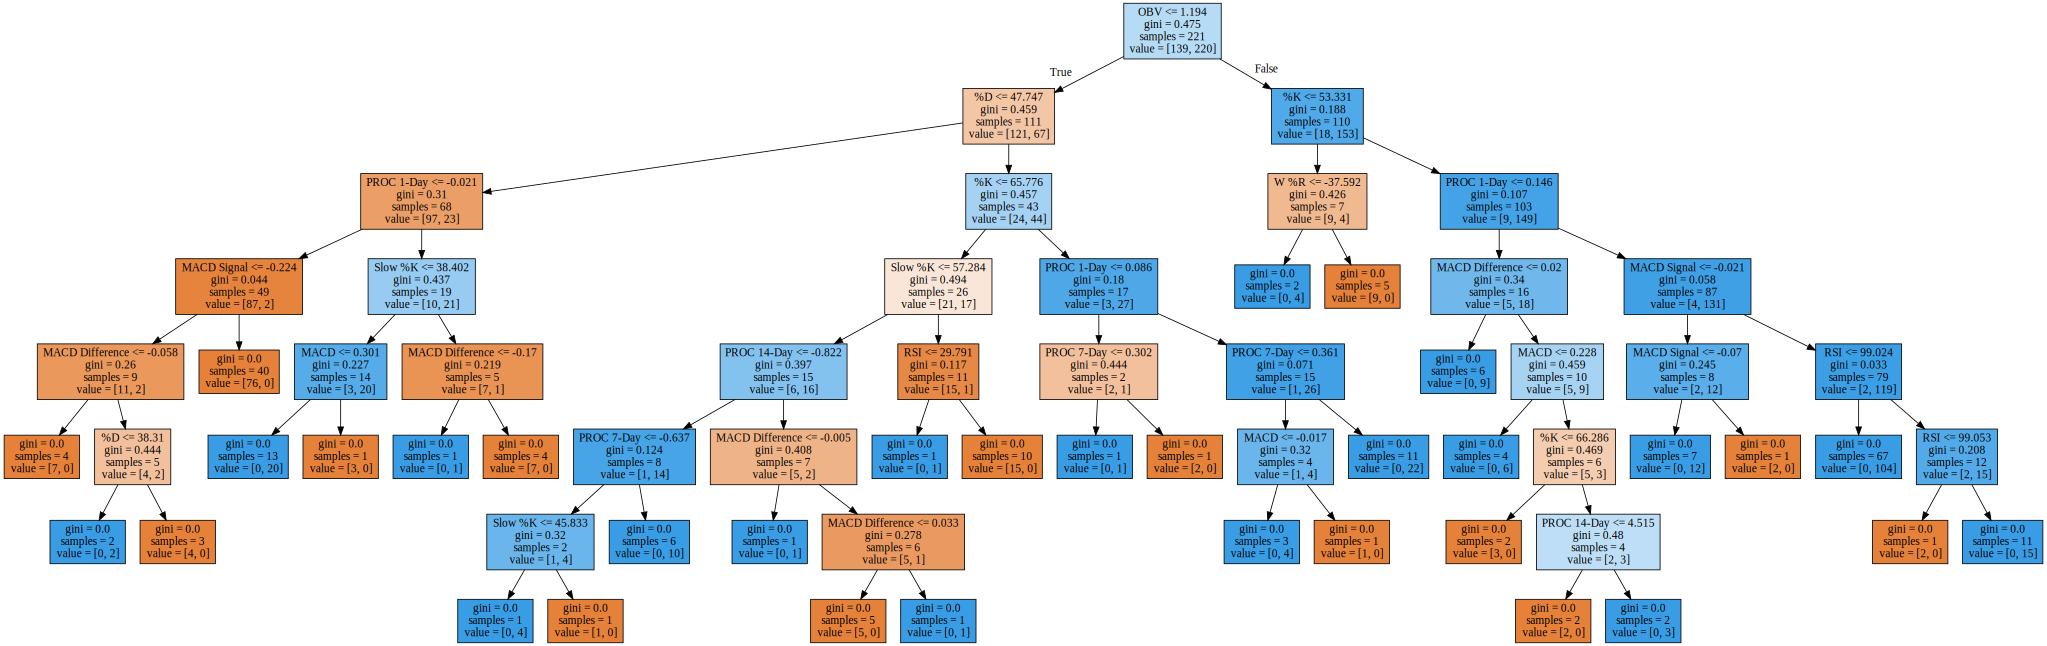

In [46]:
dot_data = tree.export_graphviz(Random_Forest.estimators_[0], filled=True, feature_names=Feature_Names)
graphviz.Source(dot_data)

### Use Classifier on Testing Data
USE SCI-KIT LEARN METRICS TO VISUALIZE MORE DATA


In [77]:
y_pred = Random_Forest.predict(X_test)

Precision: TP / (TP + FP)           (Percentage classes labeled true that are actually true)

Recall: TP / (TP + FN)              (Percentage of True Labels that are Labeled true)

f1-score: (2 * P * R) / (P + R)     (Harmonic mean of precision and recall)


support: Used as weights to compute average values of precision, recall, and f1

In [78]:
report = classification_report(y_test, y_pred)

In [79]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.91      0.92      0.92        79

   micro avg       0.89      0.89      0.89       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.89      0.89      0.89       120



#### OOB Score

Accuracy while evaluating instances in the training set using only trees 
for which they were omitted. 


In [82]:
print(Random_Forest.oob_score_)

0.8356545961002786


### Measure Feature Importance



In [80]:
#  Get the importances from the RF
feat_importances = pd.Series(Random_Forest.feature_importances_, 
                             index=Features.columns)

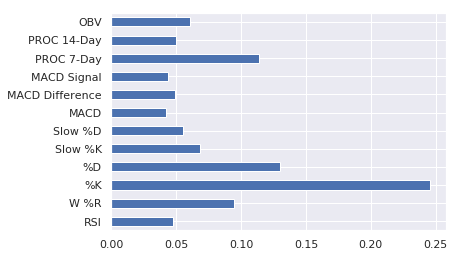

In [81]:
#  Plot the Features
feat_importances.plot(kind='barh')

# sns.set(rc={"lines.linewidth": 0.9})
# figsize_7 = (12, 10)
# figure_7, ax_7 = plt.subplots(figsize=figsize_7)
# 
# rank_attributes = sns.countplot(x=Feature_Names, data=importances)


# plt.figure(1)
# plt.title('Feature Importance')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center', )
# plt.yticks(range(len(indices)), attributes[indices])
# plt.xlabel('Relative Importance')

In [39]:
#help(pd.DataFrame().ta)

In [40]:
help(ta.obv)

Help on function obv in module pandas_ta.volume:

obv(close, volume, offset=None, **kwargs)
    On Balance Volume (OBV)
    
    On Balance Volume is a cumulative indicator to measure buying and selling
    pressure.
    
    Sources:
        https://www.tradingview.com/wiki/On_Balance_Volume_(OBV)
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/on-balance-volume-obv/
        https://www.motivewave.com/studies/on_balance_volume.htm
    
    Calculation:
        signed_volume = signed_series(close, initial=1) * volume
        obv = signed_volume.cumsum()
    
    Args:
        close (pd.Series): Series of 'close's
        volume (pd.Series): Series of 'volume's
        offset (int): How many periods to offset the result.  Default: 0
    
    Kwargs:
        fillna (value, optional): pd.DataFrame.fillna(value)
        fill_method (value, optional): Type of fill method
    
    Returns:
        pd.Series: New feature generated.

